In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math
np.set_printoptions(4,suppress=True)

In [2]:
def cv2_imshow(imgz, title=None, cmap='gray'):
    plt.imshow(imgz, cmap=cmap)
    if title is not None:
        plt.title(title)
    plt.show()

im shape: (540, 960)
im dim: 2


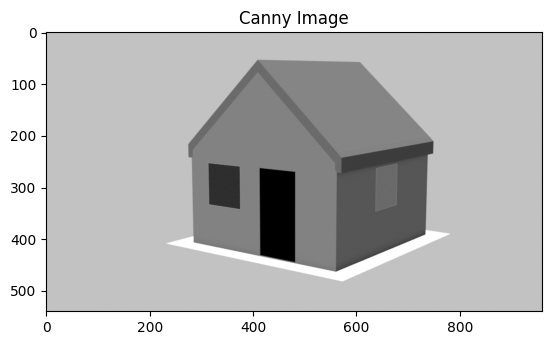

im shape: (540, 960)
im dim: 2


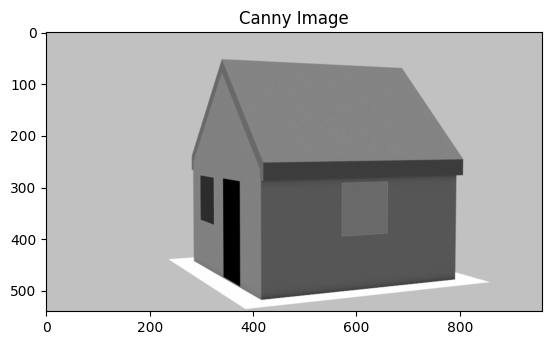

In [3]:
image = cv2.imread("house1.png", 0)
print("im shape:",image.shape)
print("im dim:",image.ndim)
cv2_imshow(image, "Canny Image")

image = cv2.imread("house2.png", 0)
print("im shape:",image.shape)
print("im dim:",image.ndim)
cv2_imshow(image, "Canny Image")



In [4]:
image1_points = [[285, 410], #1
                 [415, 271], #2
                 [483, 277], #3
                 [608, 62],  #4
                 [750, 215], #5
                 [575, 485], #6
                 [410, 60],  #7
                 [682, 340], #8
                 [278, 245], #9
                 [735, 392]] #10

image2_points = [[285, 446], #1
                 [344, 290], #2
                 [375, 295], #3
                 [690, 75],  #4
                 [806, 251], #5
                 [388, 538], #6
                 [341, 59],  #7
                 [662, 395], #8
                 [285, 270], #9
                 [792, 482]] #10

world_points = [
    [-1.0 ,-1.0, 0.0, 1.0],
    [0.015545, -1.0, 0.965257, 1.0],
    [0.491684, -1.0, 0.965257, 1.0],
    [0.0, 1.03586, 2.1009, 1.0],
    [1.05319, 1.03586, 1.15121, 1.0],
    [1.22323, -1.22323, 0.0, 1.0],
    [0.0, -1.0, 2.1009, 1.0],
    [1.0, 0.234552, 0.489472, 1.0],
    [-1.05319, -1.0, 1.0, 1.0],
    [1.0, 1.0, 0.0, 1.0]
]

In [5]:
# world_points = []
# file1 = open('coords.txt', 'r')
# Lines = file1.readlines()
# for line in Lines:
#     point = np.asarray(line.strip().split(" "), dtype= float)
#     world_points.append(point)

In [25]:
def projection_matrix(world_coords, image_coords):

    # Projection matrix P is a 3x4
    # instead of xj = PXj, we only need  𝜆xj = PXj for some 𝜆 != 0, therefore we can say xj * PXj = 0

    # create a matrix A and fill it with zeros
    # A is of size 2n x 12
    # 2n because we have 2 image coordinates for every world coordinate
    # 12 because we have 11 parameters (so 11 DoF) plus 1
    A = np.zeros((2 * len(world_coords), 12))

    for i in range(len(world_coords)):
        X, Y, Z, _ = world_coords[i] # w is given as 1
        x, y = image_coords[i]
        #
        # A[2 * i, :]     = [-X, -Y, -Z, -1,    0,  0,  0,  0,    x * X, x * Y, x * Z, x]     # x
        # A[2 * i + 1, :] = [ 0,  0,  0,  0,   -X, -Y, -Z, -1,    y * X, y * Y, y * Z, y]     # y
        A[2 * i + 1, :]     = [-X, -Y, -Z, -1,    0,  0,  0,  0,    x * X, x * Y, x * Z, x]     # x
        A[2 * i, :] = [ 0,  0,  0,  0,   -X, -Y, -Z, -1,    y * X, y * Y, y * Z, y]     # y


    # singular value decomposition A = UΣV^T

    _, _, V = np.linalg.svd(A)

    # last column of V and reshape it to 3x4
    #p = V[:,-1]
    p = V[-1] # WHY DOES THIS WORK!?

    # norm of p must is 1
    # print("p norm" ,np.linalg.norm(p))

    p_matrix = p.reshape((3, 4))



    return p_matrix

In [24]:
def compare_points(camera_points, Proj_m):
    # Prints the predicted 2d points based on 3D world coordinates and our P
    print("\nPoint comparison by x = PX")
    for i in range(len(world_points)):
        point = Proj_m @ world_points[i]
        print("point", i+1)
        print(np.round((point/point[-1])[:-1]),
              "vs manually selected",
              camera_points[i])
    print("---------\n")

In [26]:
P = projection_matrix(world_points, image1_points)

compare_points(image1_points,P)



Point comparison by x = PX
point 1
[287. 410.] vs manually selected [285, 410]
point 2
[415. 268.] vs manually selected [415, 271]
point 3
[484. 277.] vs manually selected [483, 277]
point 4
[609.  62.] vs manually selected [608, 62]
point 5
[750. 215.] vs manually selected [750, 215]
point 6
[576. 487.] vs manually selected [575, 485]
point 7
[410.  61.] vs manually selected [410, 60]
point 8
[679. 338.] vs manually selected [682, 340]
point 9
[276. 246.] vs manually selected [278, 245]
point 10
[735. 393.] vs manually selected [735, 392]
---------

